# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [3]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

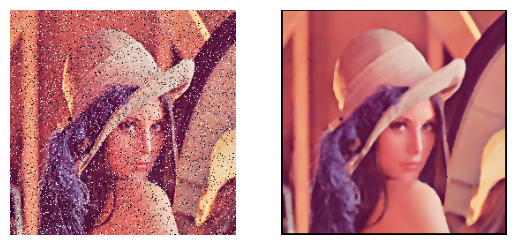

In [4]:
lena_rgb = cv2.imread('lenaRGBSzum.png')
height, width, _ = lena_rgb.shape
filtered_image = np.zeros_like(lena_rgb)
window_size = 5 
margin = window_size // 2
for row in range(margin, height - margin):
        for col in range(margin, width - margin):
            window = lena_rgb[row - margin:row + margin + 1, col - margin:col + margin + 1, :].astype("float")
            distances = np.zeros((window_size, window_size))
            for rowWin in range(window_size):
                for colWin in range(window_size):
                    diff = window - window[rowWin, colWin]
                    squared_diff = np.square(diff)
                    distances[rowWin, colWin] = np.sqrt(squared_diff.sum(axis=2)).sum()

            min_index_flat = np.argmin(distances)
            min_index = np.unravel_index(min_index_flat, (window_size, window_size))
            filtered_image[row, col] = window[min_index]

fix, axis = plt.subplots(1, 2)
axis[0].imshow(cv2.cvtColor(lena_rgb, cv2.COLOR_BGR2RGB))
axis[1].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
axis[0].axis('off')
axis[1].axis('off')

plt.show()